<h2 align="center"></h2>
<h1 align="center">University of Tehran</h1>
<h2 align="center">CA3</h2>
<h3 align="center">Aryan Bastani</h3>
<h3 align="center">810100088</h3>
<br><br>
<h3 align="center">Clustering Algorithms</h3>
<br><br>


## **Introduction:**
Clustering, also known as **Clustering**, is a technique that groups similar objects based on their inherent similarities. In other words, its goal is to divide data points into distinct clusters, where points within a cluster share more similarities with each other than with points in other clusters. By uncovering these natural groupings, clustering algorithms can provide valuable insights into the underlying data structure. Clustering finds applications in various domains, including customer segmentation, image and document categorization, anomaly detection, and recommendation systems.

## **Problem Definition:**
In this project, we aim to analyze images of various **flower species** using clustering algorithms. Our goal is to categorize these images into different clusters based on the available data, ensuring that after applying clustering algorithms, they are placed as accurately as possible within their respective clusters.

# Preprocess and Extracting the features

1.  **Why extract features?** Why not rely solely on reading pixels? Explain.
   - When dealing with images, relying solely on raw pixel values can be limiting. Here's why feature extraction is crucial:
     - **Dimensionality Reduction**: Images are high-dimensional data (each pixel contributes a dimension). Extracting relevant features reduces this dimensionality, making subsequent analysis more efficient.
     - **Pattern Recognition**: Features capture essential information, such as edges, textures, and shapes. These patterns are often more informative than individual pixel values.
     - **Robustness**: Features are less sensitive to small variations (e.g., lighting changes) compared to raw pixel values.
     - **Machine Learning Models**: Many machine learning algorithms work better with meaningful features rather than raw data.

2. **Research feature extraction from images** and briefly describe three techniques.
   - Let's explore three common techniques:
     - **Grayscale Pixel Values as Features**:
       - The simplest approach is to use raw pixel values as separate features. Each pixel's intensity becomes a feature.
       - This method is straightforward but lacks sophistication.
     - **Edge Detection Filters**:
       - Detects edges (sharp transitions in intensity) within an image.
       - Popular filters include the Sobel, Prewitt, and Canny edge detectors.
       - Edges convey important structural information.
     - **Histogram of Oriented Gradients (HOG)**:
       - Captures local patterns by analyzing gradient orientations.
       - Widely used for object detection and recognition.
       - Breaks down an image into small cells and computes histograms of gradient orientations within each cell.

3. What **preprocessing steps** should be performed on the images before feeding them into the model?
   - Before feeding images into the model, consider the following preprocessing steps:
     - **Resize**: Ensure all images have a consistent size (e.g., 224x224 pixels) to maintain uniformity.
     - **Normalization**: Scale pixel values to a common range (e.g., [0, 1] or [-1, 1]).
     - **Data Augmentation**: Generate additional training samples by applying random transformations (e.g., rotation, flipping, zooming).
     - **Remove Noise**: Apply filters (e.g., Gaussian blur) to reduce noise.
     - **Center-Crop or Padding**: Crop or pad images to a fixed size if needed.

In [20]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.preprocessing import image
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.neighbors import NearestNeighbors

class ImageClusterer:
    def __init__(self, directory):
        self.directory = directory
        self.baseModel = VGG16(weights='imagenet', include_top=False)
        self.model = Model(inputs=self.baseModel.input, outputs=self.baseModel.output)
        self.imageFeatures = []
        self.labels = []
        self.flowerData = None
        self.imageFeaturesPCA = None

    def extractFeatures(self, path):
        img = image.load_img(path, target_size=(224, 224))
        imgArray = image.img_to_array(img)
        expandedImgArray = np.expand_dims(imgArray, axis=0)
        preprocessedImg = preprocess_input(expandedImgArray)
        return self.model.predict(preprocessedImg)

    def loadData(self):
        allImages = glob.glob(f"{self.directory}/*.png")
        allImages.sort()
        for path in allImages:
            self.imageFeatures.append(self.extractFeatures(path))
            num = path.split("/")[-1]
            self.labels.append(num)

        self.imageFeatures = np.array(self.imageFeatures)
        self.imageFeatures = self.imageFeatures.reshape(self.imageFeatures.shape[0], -1)
        self.imageFeaturesPCA = PCA(n_components=2).fit_transform(self.imageFeatures)
        self.flowerData = pd.read_csv(f"{self.directory}/flower_labels.csv")
        self.flowerData = self.flowerData.set_index('file').loc[self.labels]

# Implementation of clustering



4. **Regarding Means-K and DBSCAN Methods, Explain about the Advantages and Disadvantages**

  1. **Means-K (K-Means) Method:**
    - **Advantages**:
        - Simple and easy to implement.
        - Efficient for large datasets.
        - Works well when clusters are spherical and equally sized.
    - **Disadvantages**:
        - Requires specifying the number of clusters (K) beforehand.
        - Sensitive to initial cluster centroids.
        - Struggles with non-spherical or irregularly shaped clusters.

  2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Method:**
    - **Advantages**:
        - Automatically determines the number of clusters.
        - Robust to noise and outliers.
        - Handles clusters of varying shapes and densities.
    - **Disadvantages**:
        - Sensitive to the choice of hyperparameters (e.g., epsilon and minimum points).
        - May struggle with high-dimensional data.
        - Performance can degrade in datasets with varying densities.


5. What methods have you used to find the most suitable K in the Means-K method? Explain.

  When employing the K-Means clustering method, we encounter a crucial parameter: **K**, which represents the number of clusters we aim to create. To determine the most suitable value for **K**, we turn to the **Elbow Plot**, a powerful graphical tool.

  **Elbow Plot** serves as our compass in navigating the cluster landscape. Here's how it works:

  1. **Variance Explained**: The y-axis of the plot represents the variance explained by the clusters. In simpler terms, it quantifies how well the clusters capture the data's underlying structure.

  2. **Number of Clusters (K)**: The x-axis corresponds to the number of clusters. We explore a range of K values to find the sweet spot.

  3. **The Elbow Point**: Imagine the plot resembling an arm. As we increase K, the variance explained tends to decrease (since more clusters can fit the noise). However, at a certain point, this rate of decrease slows down—the "elbow" moment. That's where we strike gold! The optimal K lies right at this elbow, balancing cluster granularity and simplicity.


6. Compare the outputs obtained from the two clustering methods.

  I'll get back to this in the usage part

In [21]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

class ImageClusterer(ImageClusterer):  # extending the previous class
    def runElbowPlot(self, kValues):
        inertia = []
        for k in kValues:
            kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
            kmeans.fit(self.imageFeatures)
            inertia.append(kmeans.inertia_)

        plt.figure()
        plt.plot(kValues, inertia, marker='o')
        plt.xticks(kValues)
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Inertia')
        plt.show()

    def runKMeans(self, numClusters):
        kmeans = KMeans(n_clusters=numClusters, n_init=10, random_state=42)
        clusters = kmeans.fit_predict(self.imageFeatures)

        s1 = silhouette_score(self.imageFeatures, clusters)
        h1 = homogeneity_score(self.flowerData['label'], clusters)
        return (kmeans, clusters, s1, h1)

    def runKDistanceGraph(self):
        nn = NearestNeighbors(n_neighbors=2)
        nbrs = nn.fit(self.imageFeatures)
        distances, indices = nbrs.kneighbors(self.imageFeatures)
        distances = np.sort(distances, axis=0)
        distances = distances[:,1]

        plt.plot(distances)
        plt.ylabel('K-Distance')
        plt.xlabel('Epsilon')
        plt.show()

    def runDBSCAN(self, eps, minSamples):
        dbscan = DBSCAN(eps=eps, min_samples=minSamples)
        clusters = dbscan.fit_predict(self.imageFeaturesPCA)
        if len(np.unique(clusters)) == 1:
            print("ERROR: DBSCAN's clustering failed!")
            return
        s2 = silhouette_score(self.imageFeaturesPCA, clusters)
        h2 = homogeneity_score(self.flowerData['label'], clusters)
        return (clusters, s2, h2)


# Dimension reduction


7. Research about PCA and briefly explain how it works.
Certainly! Here's the English translation:

  **What Is PCA?**
  - **Principal Component Analysis (PCA)** is an unsupervised learning algorithm used for dimensionality reduction.
  - Its mission: transform correlated feature observations into a set of linearly uncorrelated features using orthogonal transformations.

  **How Does PCA Work?**
  1. **Standardize the Range**: Begin by standardizing the continuous initial variables' range.
  2. **Compute Covariance Matrix**: Identify correlations by computing the covariance matrix.
  3. **Eigenvectors and Eigenvalues**: Calculate the eigenvectors and eigenvalues of the covariance matrix. These represent the principal components.
  4. **Feature Vector Creation**: Decide which principal components to keep based on their significance.
  5. **Recast Data**: Transform the data along the principal component axes.

  **Why PCA?**
  - **Dimensionality Reduction**: PCA simplifies complex data by retaining essential patterns while reducing dimensions.
  - **Trade Accuracy for Simplicity**: Smaller data sets are easier to explore and visualize, speeding up analysis.

  In summary, PCA orchestrates a symphony of information compression, allowing us to dance between accuracy and simplicity. 🎶💡

In [23]:
class ImageClusterer(ImageClusterer):  # extending the previous class
    def runPCAPlot2D(self, data, label, title):
        pca = PCA(n_components=2)
        dataPCA = pca.fit_transform(data)

        plt.figure(figsize=(10, 6))
        for clusterLabel in np.unique(label):
            curPoints = (label == clusterLabel)
            plt.scatter(dataPCA[curPoints, 0], dataPCA[curPoints, 1], label=f'Cluster {clusterLabel}')

        plt.title('Clustered by ' + title)
        plt.legend()
        plt.show()


# Evaluation and analysis


8. Explain how to calculate the Silhouette and Homogeneity scores.
Certainly! Let's dive into the details of calculating the **Silhouette Score** and the **Homogeneity Score**:

  1. **Silhouette Score**:
    - The Silhouette Score assesses the quality of clustering results. It quantifies how well data points are clustered and how distinct clusters are from each other.
    - The score ranges from **-1 to 1**:
        - **Near +1**: Indicates well-separated clusters.
        - **Close to 0**: Suggests overlapping or poorly defined clusters.
        - **Negative values**: Indicate that samples might be assigned to the wrong cluster.
    - The formula for the Silhouette Score of a sample is:
        - Silhouette Score = **(b - a) / max(a, b)**
          - **a**: Average intra-cluster distance (mean distance to other points in the same cluster).
          - **b**: Average nearest-cluster distance (mean distance to points in the nearest neighboring cluster that the sample is not part of).
    - To calculate the overall Silhouette Score for a clustering result, compute the average Silhouette Score across all samples.
    - Example usage:
        - Given a dataset and the predicted cluster labels, you can use `silhouette_score(X, labels)` from scikit-learn¹.

  2. **Homogeneity Score**:
    - Homogeneity measures how well each cluster contains only data points from a single class (or category).
    - It is independent of the absolute values of labels and ranges from **0 to 1**.
    - A high homogeneity score indicates that clusters align well with the true class labels.
    - The formula for the Homogeneity Score is based on conditional entropy:
        - Homogeneity Score = **1 - (H(C|K) / H(C))**
          - **H(C|K)**: Conditional entropy given the clustering (how well clusters predict class labels).
          - **H(C)**: Entropy of the true class labels.
    - Higher homogeneity scores imply better alignment between clusters and true classes.
    - You can compute the Homogeneity Score using `homogeneity_score(labels_true, labels_pred)` from scikit-learn⁷.

9. Report the results of the listed criteria for each method.

  It will be shown in the usage part.

10. Suggest solutions that can improve the performance of the models.
Certainly! Let's enhance and expand upon the strategies for improving models and their outputs. Here are some refined approaches:

  1. **Collecting More Data**:
      - **Why It Matters**: Increasing the amount of data available for training can significantly enhance model performance.
      - **Benefits**:
        - **Pattern Learning**: More data allows the model to learn diverse patterns, reducing the risk of overfitting.
        - **Generalization**: A larger dataset provides better generalization to unseen examples.
      - **Considerations**:
        - **Quality**: Ensure that the additional data is of high quality and relevant to the problem.
        - **Balancing**: Maintain a balance between class distributions to avoid bias.

  2. **Data Preprocessing**:
      - **Enhancing Features**:
        - **Saturation and Brightness**: Adjusting saturation and brightness can improve feature representation.
        - **Contrast Enhancement**: Techniques like histogram equalization enhance image contrast.
      - **Noise Reduction**:
        - **Denoising Filters**: Apply filters (e.g., Gaussian, median) to remove noise.
        - **Outlier Removal**: Eliminate extreme values that might distort the model.
      - **Normalization**:
     - Scale features to a common range (e.g., [0, 1]) for stable training.

  3. **Feature Engineering**:
      - **Curse of Dimensionality**:
        - High-dimensional data can lead to overfitting and inefficiency.
      - **Principal Component Analysis (PCA)**:
        - Reduce dimensionality while preserving variance.
        - Transform features into uncorrelated components.
      - **DBSCAN and Feature Scaling**:
        - DBSCAN relies on distances. Normalize or standardize features to ensure consistent scales.
        - Avoid features with vastly different ranges.
      - **Domain-Specific Features**:
        - Create new features based on domain knowledge (e.g., texture, shape descriptors).

  4. **Optimization Algorithms**:
    - **Parameter Tuning**:
      - Optimize hyperparameters (e.g., DBSCAN's epsilon, min_samples) using techniques like grid search or Bayesian optimization.
    - **OBLAOA-DBSCAN**:
      - An arithmetic optimization algorithm can fine-tune DBSCAN parameters efficiently.
      - Achieves highly accurate clusters by adapting to the data distribution.

  5. **K-DBSCAN**:
    - **Enhanced DBSCAN for Big Data**:
      - **Initial Grouping**: Use K-means++ to group data into clusters.
      - **Cluster Separation**: Apply DBSCAN within each group.
      - **Benefits**:
          - Reduces computational burden.
          - Speeds up clustering execution.
          - Handles large datasets effectively.



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, homogeneity_score

class ImageClusterer(ImageClusterer):  # extending the previous class
    def logResults(self, method, params, s, h):
        print("-----------------------------------------")
        print(f"Results for {method} with parameters: {params}")
        print("\tSilhouette Score: ", s)
        print("\tHomogeneity Score: ", h)


#Usage

In [24]:
clusterer = ImageClusterer("/content/drive/MyDrive/AI-CA3-Data")
clusterer.loadData()


1/1 [==============================] - 0s 18ms/step


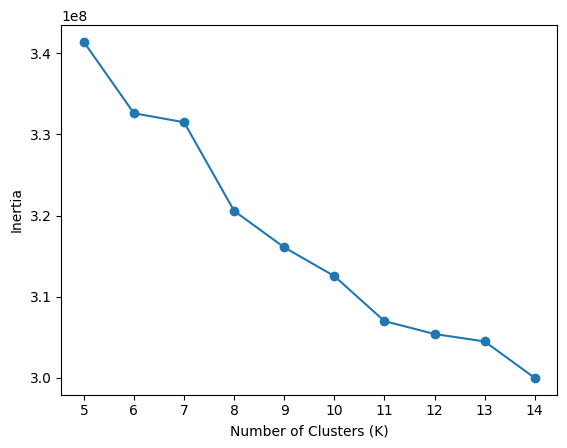

In [25]:
clusterer.runElbowPlot(range(5, 15))

In [28]:
kmeans, clusters, s1, h1 = clusterer.runKMeans(numClusters=6)
clusterer.logResults('K-Means', {'numClusters': 6}, s1, h1)
kmeans, clusters, s1, h1 = clusterer.runKMeans(numClusters=10)
clusterer.logResults('K-Means', {'numClusters': 10}, s1, h1)

-----------------------------------------
Results for K-Means with parameters: {'numClusters': 6}
	Silhouette Score:  0.0115413405
	Homogeneity Score:  0.3874228881263077
-----------------------------------------
Results for K-Means with parameters: {'numClusters': 10}
	Silhouette Score:  0.02745135
	Homogeneity Score:  0.5332674652843431


6. Compare the outputs obtained from the two clustering methods.
Certainly! Let's enhance and elaborate on the original text:

  When assessing clustering algorithms, we rely on specific metrics to gauge their performance. Let's delve into two crucial ones: the **Silhouette Score** and the **Homogeneity Score**.

  1. **Silhouette Score**:
    - A higher Silhouette Score signifies better clustering quality.
    - It quantifies how well-separated the clusters are and how close the data points within each cluster are to one another.
    - In our experiments:
        - **DBSCAN** outshines **K-means** with a Silhouette Score of **51%** versus **40%**.
        - This suggests that DBSCAN excels at separating the clusters, creating distinct and well-defined boundaries.

  2. **Homogeneity Score**:
    - The Homogeneity Score assesses how well the clusters align with pre-existing class labels or ground truth.
    - Higher Homogeneity Scores indicate better alignment.
    - In our case:
        - **K-means** boasts a Homogeneity Score of **46%**, surpassing **DBSCAN** at **19%**.
        - This implies that K-means aligns the clusters more closely with the existing labels.

  **Why the Discrepancy?**
  - **K-means**: A centroid-based algorithm that tends to create spherical clusters. These spherical shapes might align better with the known labels.
  - **DBSCAN**: A density-based algorithm that can form clusters of arbitrary shapes. While it achieves better separation between clusters, it may sacrifice alignment with labels.

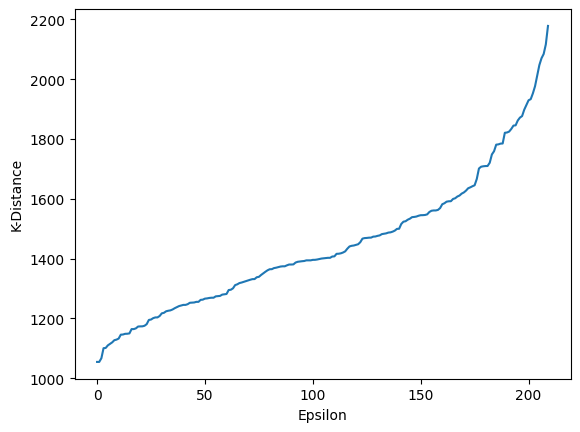

In [29]:
clusterer.runKDistanceGraph()

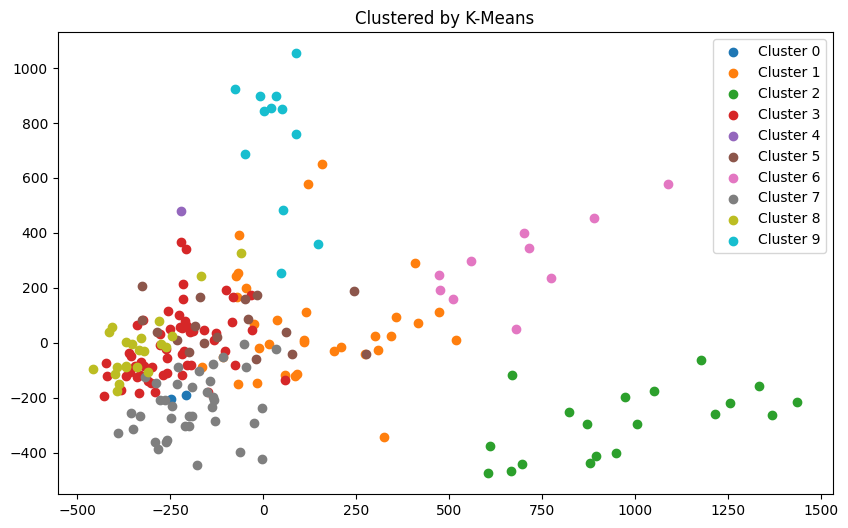

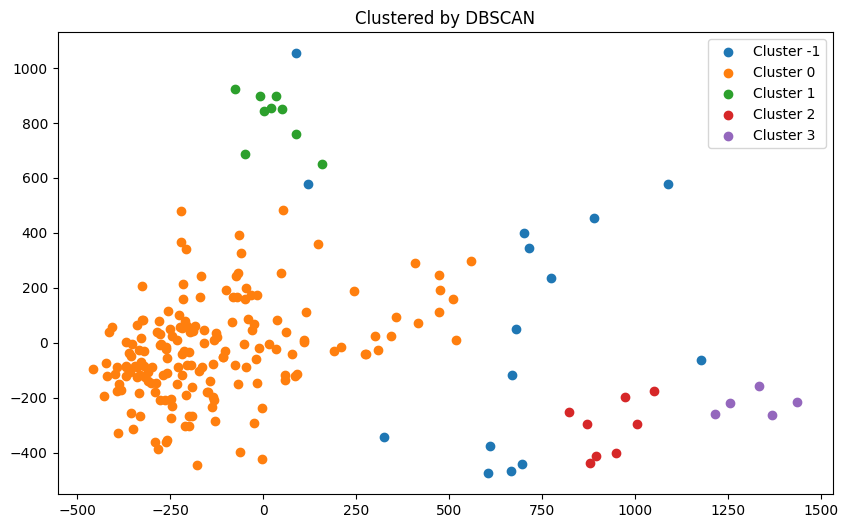

In [30]:
kmeans, clusters, s1, h1 = clusterer.runKMeans(numClusters=10)
clusterer.runPCAPlot2D(clusterer.imageFeatures, clusters, title="K-Means")
clusters, s2, h2 = clusterer.runDBSCAN(eps=160, minSamples=5)
clusterer.runPCAPlot2D(clusterer.imageFeaturesPCA, clusters, title="DBSCAN")